In [46]:
HOME = '/home/itamar/thesis/FacialLandmarkDetectionThesis'

import os
import clearml
import torch
# from top_level import TopLevel
import main.globals as g
os.chdir(HOME)
from main.top_level import TopLevel
from main.components.trainer import LDMTrain
from utils.file_handler import FileHandler
timestamp = FileHandler.get_datetime()
g.TIMESTAMP = timestamp
from main.components.CLMDataset import CLMDataset, get_def_transform, get_data_list
from torch.utils import data
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [8]:
tl = TopLevel()
tl.init(task_id=None)
tl.setup_workspace()
lmd_train = LDMTrain(params=tl.params, last_epoch=tl.task.get_last_iteration(), logger=tl.logger)


Number of train images : 7862
Number of valid images : 1965
Loading DETR Model
2021-08-01 19:40:10,099 - clearml.model - INFO - Selected model id: b398ead37b2e4ba18a80dcc60fe2b4da


100%|██████████| 202/202 [00:00<00:00, 671.85it/s]


In [19]:
df = get_data_list(worksets_path=lmd_train.workset_path, datasets=lmd_train.tr.datasets.to_use, nickname='mean_face', numpts=68)
dfset = CLMDataset(lmd_train.pr, lmd_train.paths, df)
df_loader = data.DataLoader(dfset, batch_size=32, shuffle=False)


In [33]:
mean_pts_ls = []
for batch_idx, item in enumerate(tqdm(train_loader)):
    input_, tpts, scale = item['img'], item['tpts'], item['sfactor']
    mean_pts_ls.append(np.array(tpts))

100%|██████████| 246/246 [00:21<00:00, 11.45it/s]


In [43]:
mean_pts = np.vstack(np.array(mean_pts_ls))

In [44]:
pts = mean_pts.mean(0)

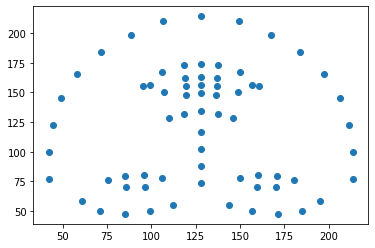

In [51]:
plt.scatter(pts.T[0], pts.T[1])

In [54]:
np.save(os.path.join(HOME, 'mean_face'), pts)

2021-08-02 00:24:36,076 - clearml.Task - ERROR - Action failed <400/101: tasks.get_by_id/v1.0 (Invalid task id: id=4344c5ff0e5f418295f2f6912d91b897, company=2c6b66b6a9814e81a518c8db36d06569)> (task=4344c5ff0e5f418295f2f6912d91b897)
2021-08-02 00:24:36,077 - clearml.Task - ERROR - Failed reloading task 4344c5ff0e5f418295f2f6912d91b897
2021-08-02 00:24:36,078 - clearml.Task - WARNING - ### TASK STOPPED - USER ABORTED - STATUS CHANGED ###
